In [34]:
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt
from tqdm import tqdm


In [51]:
def U_lj_0(r, sigma_0=1., eps_0=1.):
    np.random.seed(seed=42)
    return 4*eps_0*((sigma_0/r)**12 - (sigma_0/r)**6) + np.random.normal(scale=0.01, size=len(r))

def U_lj(sigma, eps, r):
    return 4*eps*((sigma/r)**12 - (sigma/r)**6)

def grad_Loss(sigma, eps, r):
    return - 2*(U_lj_0(r) - U_lj(sigma, eps, r)) * 4*eps*(12/r*(sigma/r)**11 - 6/r*(sigma/r)**5), \
            - 2*(U_lj_0(r) - U_lj(sigma, eps, r)) * 4*((sigma/r)**12 - (sigma/r)**6)

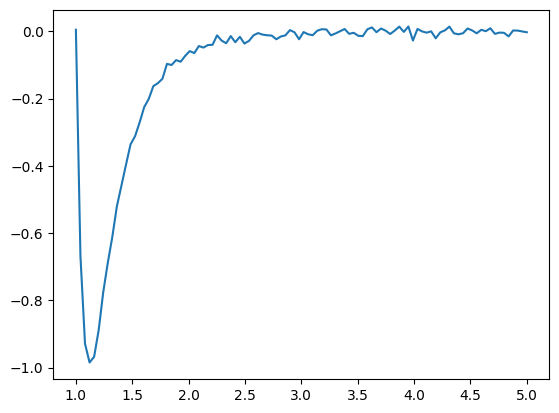

In [52]:
sigma_0 = 1.
eps_0 = 1.

r = np.linspace(1, 5, 100)
plt.plot(r, U_lj_0(r, sigma_0, eps_0))

In [68]:
Sigma_init = np.linspace(0.1, 10.1, 10)
Eps_init = np.linspace(0.5, 2., 10)
step_size = 0.1

# Sigma_init = np.linspace(0.1, 10.1, 1)
# Eps_init = np.linspace(0.5, 2., 1)

Predictions = np.zeros(shape=(len(Sigma_init), len(Eps_init), 2))

max_iter = 100000
for i, sigma_init in tqdm(enumerate(Sigma_init)):
    for j, eps_init in tqdm(enumerate(Eps_init)):
        sigma = sigma_init
        eps = eps_init

        iter = 0
        print(f'iter {i}, {j}')
        while abs(sigma_init - sigma_0) > 0.05 and abs(eps_init - eps_0) > 0.05:
            if iter >= max_iter:
                print('max iter reached')
                break
            grad_sigma, grad_eps = grad_Loss(sigma, eps, r)
    
            sigma -= np.sign(grad_sigma.sum()) * min(step_size, abs(grad_sigma.sum() / len(grad_sigma)) )
            eps -= np.sign(grad_eps.sum()) * min(step_size, abs(grad_eps.sum() / len(grad_eps)) )

            # print(grad_sigma.sum() / len(grad_sigma))
            # print(grad_eps.sum() / len(grad_eps))
            iter += 1

        print(sigma, eps)
        Predictions[i, j, 0], Predictions[i, j, 1] = sigma, eps

0it [00:00, ?it/s]

iter 0, 0


max iter reached
1.0447115512161262 0.7967009609997056
iter 0, 1


max iter reached
1.074083532665126 0.48302378986267264
iter 0, 2


max iter reached
0.9473519344959512 0.7471890887754901
iter 0, 3
0.1 1.0
iter 0, 4


max iter reached
1.0718909374166927 0.507980094803798
iter 0, 5


max iter reached
1.0298769814889333 0.901431512603695
iter 0, 6


max iter reached
0.9411405943136294 0.8086333584806097
iter 0, 7


max iter reached
1.0338036276928293 0.8783850635636912
iter 0, 8


max iter reached
1.0730402410911815 0.49487023704653244
iter 0, 9


10it [01:45, 10.54s/it]
1it [01:45, 105.37s/it]

max iter reached
1.0388720897916215 0.8436684393173874


iter 1, 0


max iter reached
1.04304769895438 0.810829092896891
iter 1, 1


max iter reached
1.0659862283603254 0.5757322611253541
iter 1, 2


max iter reached
1.0250318290734397 0.9254492210209049
iter 1, 3
1.2111111111111112 1.0
iter 1, 4


max iter reached
1.011111111111111 0.9711933967774331
iter 1, 5


max iter reached
1.011111111111111 0.9711933967774338
iter 1, 6


max iter reached
1.007995809187394 0.9776307864006596
iter 1, 7


max iter reached
0.9615258249648836 0.5764475444212608
iter 1, 8


max iter reached
0.9577507158935291 0.625128617930428
iter 1, 9


10it [01:44, 10.47s/it]
2it [03:30, 104.95s/it]

max iter reached
0.9492764550798255 0.7262577652965903


iter 2, 0


max iter reached
1.0455461665503503 0.78939695041938
iter 2, 1


max iter reached
0.9653976052512604 0.5251299924459752
iter 2, 2


max iter reached
1.0488443477003138 0.7591695873909436
iter 2, 3
2.3222222222222224 1.0
iter 2, 4


max iter reached
0.9553661051470711 0.6548870415477052
iter 2, 5


max iter reached
1.0740751581066532 0.4831186452068559
iter 2, 6


max iter reached
0.9449942503936867 0.7716428451882696
iter 2, 7


max iter reached
0.9222222222222213 0.9348963422606517
iter 2, 8


max iter reached
0.9222222222222213 0.9348963422606517
iter 2, 9


10it [01:44, 10.47s/it]
3it [05:14, 104.85s/it]

max iter reached
0.9222222222222213 0.9348963422606517


iter 3, 0


max iter reached
1.021624076563486 0.9396153530462064
iter 3, 1


max iter reached
1.0294418411158563 0.9037839505891124
iter 3, 2


max iter reached
0.932875976681571 0.8749187320591918
iter 3, 3
3.4333333333333336 1.0
iter 3, 4


max iter reached
1.0740948990468666 0.48289505382543657
iter 3, 5


max iter reached
1.0565279279513093 0.6812989082555333
iter 3, 6


max iter reached
1.0216240773055394 0.9396153501921262
iter 3, 7


max iter reached
1.0294418411158568 0.90378395058911
iter 3, 8


max iter reached
0.9328759766815707 0.874918732059193
iter 3, 9


10it [01:44, 10.46s/it]
4it [06:59, 104.74s/it]

max iter reached
0.9216240772730727 0.9374902300248689


iter 4, 0


max iter reached
1.074099153497458 0.4828468697021454
iter 4, 1


max iter reached
1.0239636452361451 0.9301219658045042
iter 4, 2


max iter reached
0.9323358883531921 0.8786291039377772
iter 4, 3
4.544444444444444 1.0
iter 4, 4


max iter reached
1.0370107383476639 0.8570758336230799
iter 4, 5


max iter reached
1.0730674047471849 0.4945610891541258
iter 4, 6


max iter reached
1.0740992248713908 0.4828460613599017
iter 4, 7


max iter reached
1.0239636452361431 0.9301219658045128
iter 4, 8


max iter reached
0.9323358883531921 0.8786291039377772
iter 4, 9


10it [01:41, 10.19s/it]
5it [08:41, 103.70s/it]

max iter reached
0.9740992164387593 0.40853886083680907


iter 5, 0


max iter reached
0.9410910592242953 0.8090840330581698
iter 5, 1


max iter reached
0.9463198442007213 0.758058855516594
iter 5, 2


max iter reached
1.0528607803867407 0.7196396005660887
iter 5, 3
5.655555555555555 1.0
iter 5, 4


max iter reached
0.951033721406323 0.7064263373547932
iter 5, 5


max iter reached
1.0284954492198966 0.9087646177273244
iter 5, 6


max iter reached
0.9410630592794206 0.8093384967168579
iter 5, 7


max iter reached
0.9463198442007162 0.7580588555166473
iter 5, 8


max iter reached
1.0528607803885046 0.7196396005481286
iter 5, 9


10it [01:41, 10.10s/it]
6it [10:22, 102.80s/it]

max iter reached
1.041065825122286 0.8268882680717837


iter 6, 0


max iter reached
1.0652463538176369 0.5841997449568338
iter 6, 1


max iter reached
1.0397620980321738 0.8369878216265705
iter 6, 2


max iter reached
0.9391416183845295 0.8263113150260117
iter 6, 3
6.766666666666667 1.0
iter 6, 4


max iter reached
0.9472417736107536 0.7483613205461671
iter 6, 5


max iter reached
1.0327773280583252 0.8847285964175569
iter 6, 6


max iter reached
1.0652465819765327 0.5841971366083727
iter 6, 7


max iter reached
1.039762098032182 0.8369878216265083
iter 6, 8


max iter reached
0.9391416183845326 0.8263113150259851
iter 6, 9


10it [01:41, 10.13s/it]
7it [12:03, 102.31s/it]

max iter reached
0.9652465823959119 0.5271490211337713


iter 7, 0


max iter reached
1.0587828473782623 0.6568454080600357
iter 7, 1


max iter reached
1.0482995661951395 0.7643081156569774
iter 7, 2


max iter reached
0.9300693365950342 0.893389497947833
iter 7, 3
7.877777777777778 1.0
iter 7, 4


max iter reached
1.0388618295256362 0.8437444392025795
iter 7, 5


max iter reached
0.9660639146270799 0.5162107061447152
iter 7, 6


max iter reached
1.0587791379597764 0.6568861060488778
iter 7, 7


max iter reached
1.0482995661951395 0.7643081156569774
iter 7, 8


max iter reached
0.9300693365950344 0.8933894979478313
iter 7, 9


10it [01:41, 10.12s/it]
8it [13:44, 101.95s/it]

max iter reached
0.9587786398478596 0.6120449381720027


iter 8, 0


max iter reached
1.0255205468883628 0.9232385071098795
iter 8, 1


max iter reached
1.0191493542688412 0.9486025855358465
iter 8, 2


max iter reached
0.9693581212041352 0.4719595828372549
iter 8, 3
8.988888888888889 1.0
iter 8, 4


max iter reached
0.9215854554516038 0.9376551206078876
iter 8, 5


max iter reached
1.049285389093718 0.754968830033521
iter 8, 6


max iter reached
1.0254790053260154 0.9234282175728475
iter 8, 7


max iter reached
1.0191493542688357 0.9486025855358655
iter 8, 8


max iter reached
0.9693581212042389 0.47195958283586137
iter 8, 9


10it [01:40, 10.09s/it]
9it [15:25, 101.61s/it]

max iter reached
0.9254677966351689 0.9194617389748705


iter 9, 0


max iter reached
0.9508012599106833 0.709087639594827
iter 9, 1


max iter reached
0.9580115142014568 0.621822686641097
iter 9, 2


max iter reached
0.9206618667320409 0.941505776709825
iter 9, 3
10.1 1.0
iter 9, 4


max iter reached
1.0701740070421755 0.527648391250968
iter 9, 5


max iter reached
1.0317935495630846 0.8905954050432394
iter 9, 6


max iter reached
0.9500662167985533 0.7174274022810321
iter 9, 7


max iter reached
0.9580115142013209 0.6218226866428219
iter 9, 8


max iter reached
0.9206618667320451 0.941505776709808
iter 9, 9


10it [01:57, 11.71s/it]
10it [17:22, 104.27s/it]

max iter reached
1.0497804509289526 0.7502108239006969


In [74]:
Predictions[:, :, 0]

array([[ 1.04471155,  1.07408353,  0.94735193,  0.1       ,  1.07189094,
         1.02987698,  0.94114059,  1.03380363,  1.07304024,  1.03887209],
       [ 1.0430477 ,  1.06598623,  1.02503183,  1.21111111,  1.01111111,
         1.01111111,  1.00799581,  0.96152582,  0.95775072,  0.94927646],
       [ 1.04554617,  0.96539761,  1.04884435,  2.32222222,  0.95536611,
         1.07407516,  0.94499425,  0.92222222,  0.92222222,  0.92222222],
       [ 1.02162408,  1.02944184,  0.93287598,  3.43333333,  1.0740949 ,
         1.05652793,  1.02162408,  1.02944184,  0.93287598,  0.92162408],
       [ 1.07409915,  1.02396365,  0.93233589,  4.54444444,  1.03701074,
         1.0730674 ,  1.07409922,  1.02396365,  0.93233589,  0.97409922],
       [ 0.94109106,  0.94631984,  1.05286078,  5.65555556,  0.95103372,
         1.02849545,  0.94106306,  0.94631984,  1.05286078,  1.04106583],
       [ 1.06524635,  1.0397621 ,  0.93914162,  6.76666667,  0.94724177,
         1.03277733,  1.06524658,  1.0397621 

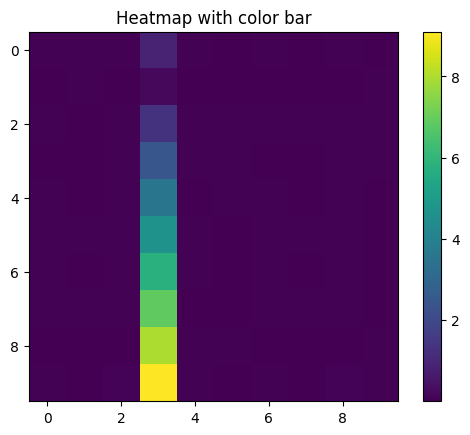

In [76]:
plt.imshow(abs(Predictions[:, :, 0] - sigma_0), interpolation='nearest')
 
# Add colorbar
plt.colorbar()
 
plt.title("Heatmap with color bar")
plt.show()

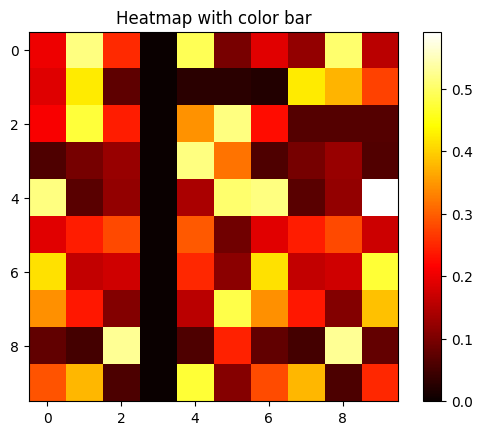

In [78]:
plt.imshow(abs(Predictions[:, :, 1]- eps_0), cmap='hot', interpolation='nearest')

# Add colorbar
plt.colorbar()
 
plt.title("Heatmap with color bar")
plt.show()